# Hands-on: Geospatial Data with `geopandas`

This hands-on will introduce you to `geopandas` which allows you to read in _vector_ spatial data and also visualize it which builds on your tool set for exploratory data analysis and visualization.

If you're interested in knowing how to handle _raster_ data, there's a library called [rasterio](https://rasterio.readthedocs.io/en/stable/).

In [12]:
#!apt install gdal-bin python-gdal python3-gdal
#!apt install python3-rtree 
#!pip install git+git://github.com/geopandas/geopandas.git
#!pip install descartes
#!pip install folium
#!pip install plotly_express

In [13]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [14]:
# Read shapefile
ph = gpd.read_file("gadm36_PHL_1.shp")
ph.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,PHL,Philippines,PHL.1_1,Abra,None,None,Lalawigan|Probinsya,Province,1401,PH.AB,"POLYGON ((120.77473 17.16318, 120.76637 17.159..."
1,PHL,Philippines,PHL.2_1,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,1602,PH.AN,"POLYGON ((125.44627 8.66631, 125.44199 8.66333..."
2,PHL,Philippines,PHL.3_1,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,1603,PH.AS,"POLYGON ((125.90923 7.99845, 125.90176 7.99794..."
3,PHL,Philippines,PHL.4_1,Aklan,None,None,Lalawigan|Probinsya,Province,604,PH.AK,"MULTIPOLYGON (((122.42083 11.63194, 122.42000 ..."
4,PHL,Philippines,PHL.5_1,Albay,None,None,Lalawigan|Probinsya,Province,505,PH.AL,"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ..."


(116.444486621, 127.08919715899998, 3.7627797585000007, 21.894300891500002)

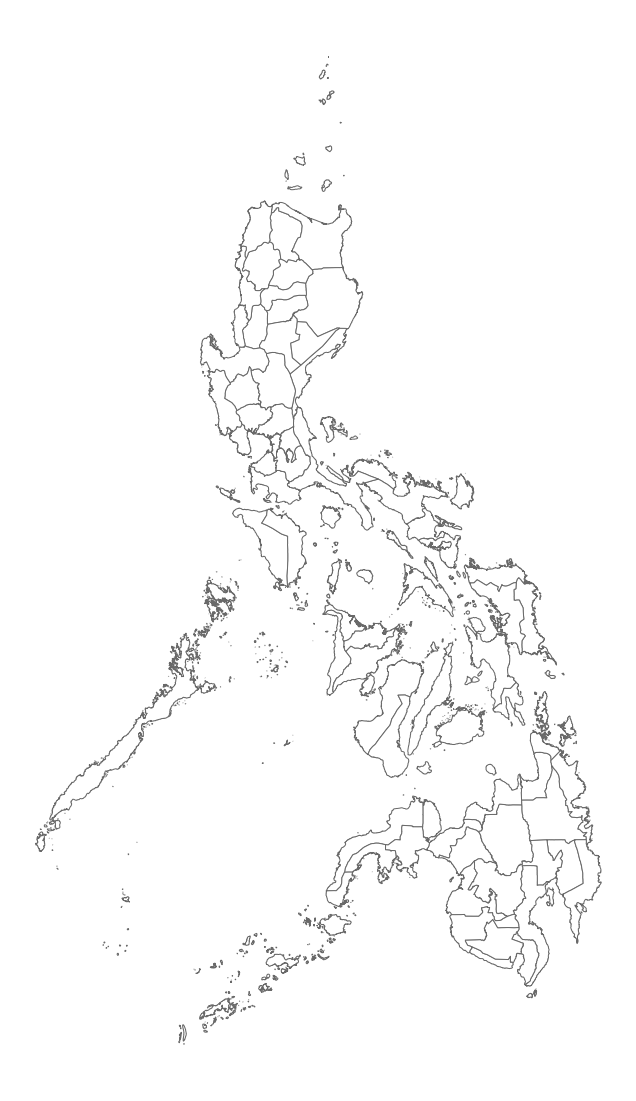

In [15]:
ax = ph.plot(figsize=(30,20), color="w", edgecolor="dimgray")

ax.axis('off')

In [16]:
# Read GeoJSON file
healthsites = gpd.read_file('philippines.geojson', driver='GeoJSON')
healthsites.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,4714668590,node,9.0,,pharmacy,,,,,46542719.0,,,,6fb6d5acfc8841b9a093117a94750833,,,,,,,1.0,,2017-03-03T08:20:18,,,,MedCore,,Innoc,,,,,,,None,None,POINT (122.63445 10.94470)
1,6489465986,node,9.0,,doctors,,,,,70494207.0,,,,d658390a61644ef4a3197d66adf2ee8f,,,,,,,1.0,,2019-05-21T22:03:08,,,,City Health Office - Iligan City,,RenAshbell,,,,,,,None,None,POINT (124.24163 8.22731)
2,775561027,way,31.0,,hospital,,Dalan na Pagayaya,Department of Health,,81346192.0,,,+6378 3020000;+6378 3043789;+6378 304 1410;+63...,d6b4acf850ac4a66a8331aa8fde2c9f1,,24/7,,,,,1.0,,2020-02-22T13:37:54,,,Tuguegarao,Cagayan Valley Medical Center,,mapbeks,,,,,hospital,government,None,None,"POLYGON ((121.74563 17.65639, 121.74616 17.657..."
3,497119467,node,15.0,,pharmacy,,Shorthorn,,,86331991.0,,,,c95ed8224a844508b7e2539345b8d7a3,,Mo-Su 07:00-22:00,,,,,4.0,,2020-06-08T05:58:39,,,,Mercury Drug,,mipangan,,,,,,,None,None,POINT (121.02008 14.66840)
4,601647960,way,12.0,,hospital,,,,,60145823.0,,,,38170810204c4c2bb7753171ab92e186,,,,,,,1.0,yes,2018-06-25T10:54:52,,,,Se単or Santo Ni単o Hospital,,GOwin,,,,,,,None,None,"POLYGON ((120.45718 15.80609, 120.45738 15.806..."


Since the data is huge, this might take a long time to run because geometric operations is quite expensive (computationally) on a local machine. 

## Basic Visualization

With `matplotlib` and `descartes` built into `geopandas`, we can easily plot a `GeoDataFrame` by simply calling the `plot` function. Most of the parameters that come with the `plot` function from `pandas` can also be used here.

(116.444486621, 127.08919715899998, 3.7627797585, 21.894300891499995)

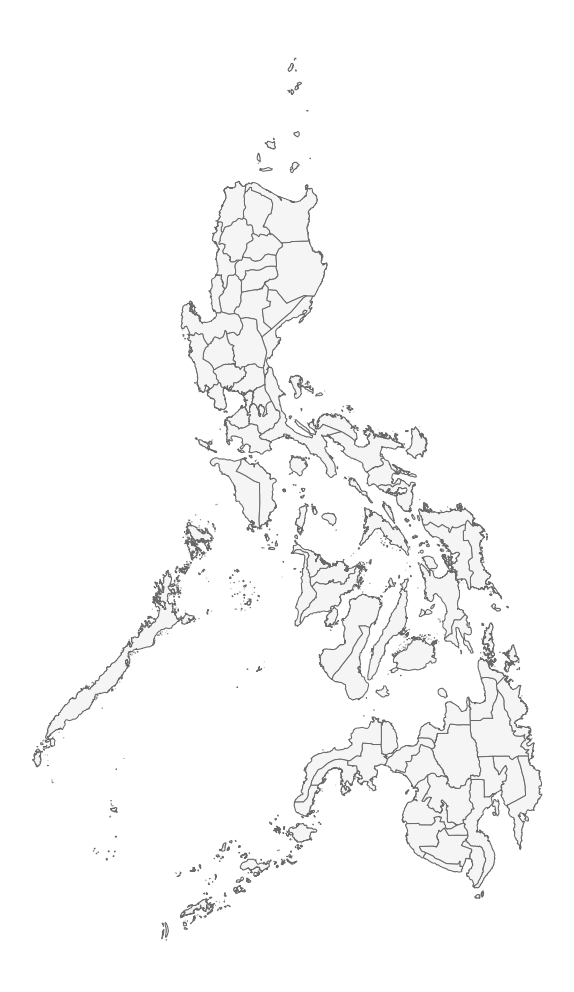

In [17]:
ax = ph.plot(figsize=(15, 18), color='whitesmoke', edgecolor='dimgray')
ax.axis('off')

In [18]:
print(healthsites.crs)
print(ph.crs)

epsg:4326
epsg:4326


In [19]:
healthsites.describe(include=np.object)

,osm_type,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag
count,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10365,10405,10405,10405,10405,10405,10365,10405,10405,10405,10405,10405,10405,1,1
unique,2,1,9,98,1668,873,5,2,2,332,10333,2,247,2,80,1,1,3,7953,282,409,432,6592,2,1667,4,7,2,26,53,16,1,1
top,node,,pharmacy,,,,,,,,2ae06d8f5e8941378c008a311c3dda22,,,,,,,,2020-10-16T22:34:26,,,,,,GOwin,,,,,,,0,"drugs, prescription, medical supplies, first-aid"
freq,7481,10405,4078,10043,7014,9311,9868,10404,10404,10069,2,10403,9645,10404,9317,10405,10405,9913,110,10041,8657,8190,935,10404,1904,10327,10399,10404,9647,6405,9330,1,1


In [20]:
healthsites.isna().sum()

osm_id                     0
osm_type                   0
completeness               0
is_in_health_zone          0
amenity                    0
speciality                 0
addr_street                0
operator                   0
water_source               0
changeset_id              40
insurance                  0
staff_doctors              0
contact_number             0
uuid                       0
electricity                0
opening_hours              0
operational_status         0
source                     0
is_in_health_area          0
health_amenity_type        0
changeset_version         40
emergency                  0
changeset_timestamp       40
addr_housenumber           0
addr_postcode              0
addr_city                  0
name                       0
staff_nurses               0
changeset_user            40
wheelchair                 0
beds                       0
url                        0
dispensing                 0
healthcare                 0
operator_type 

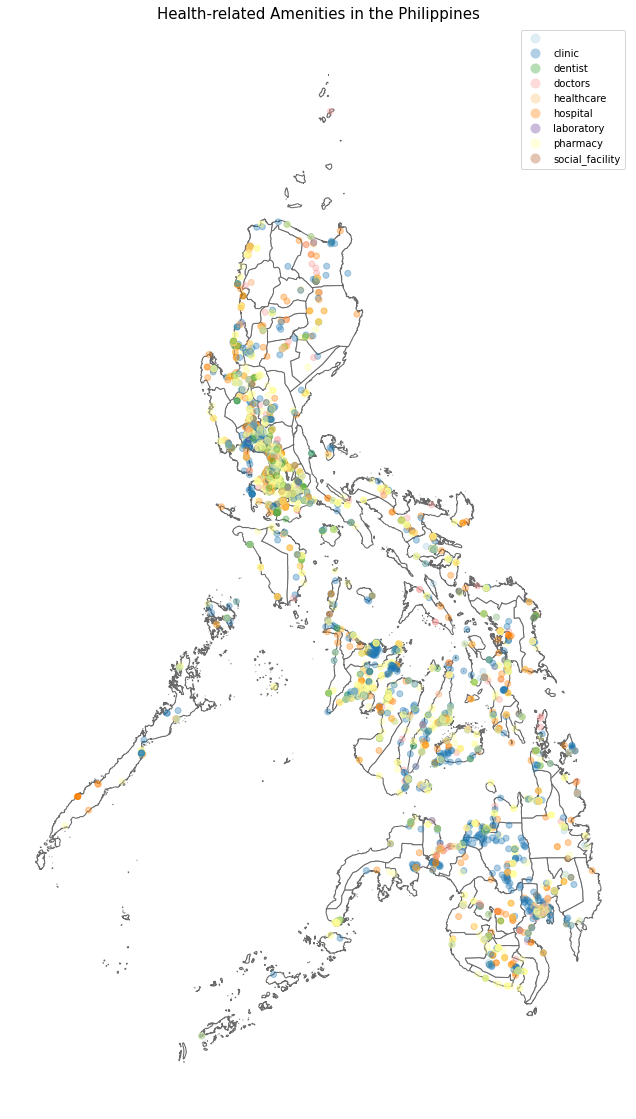

In [21]:
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)

ph.plot(ax=ax, color='white', edgecolor='dimgray')
healthsites.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Health-related Amenities in the Philippines', fontsize=15)
ax.axis('off');

In [35]:
mm = ph[ph.NAME_1=="Metropolitan Manila"]
mm_healthsites = gpd.sjoin(healthsites, mm, how='inner', op='within')
mm_healthsites.amenity.unique()

array(['pharmacy', 'doctors', 'dentist', 'clinic', '', 'hospital',
       'healthcare'], dtype=object)

In [37]:
laguna = ph[ph.NAME_1=="Laguna"]
laguna_healthsites = gpd.sjoin(healthsites, laguna, how='inner', op='within')
laguna_healthsites.amenity.unique()

array(['pharmacy', 'hospital', 'clinic', 'dentist', 'doctors', ''],
      dtype=object)

(120.90619010799999, 121.142828752, 14.327678825999998, 14.802912574)

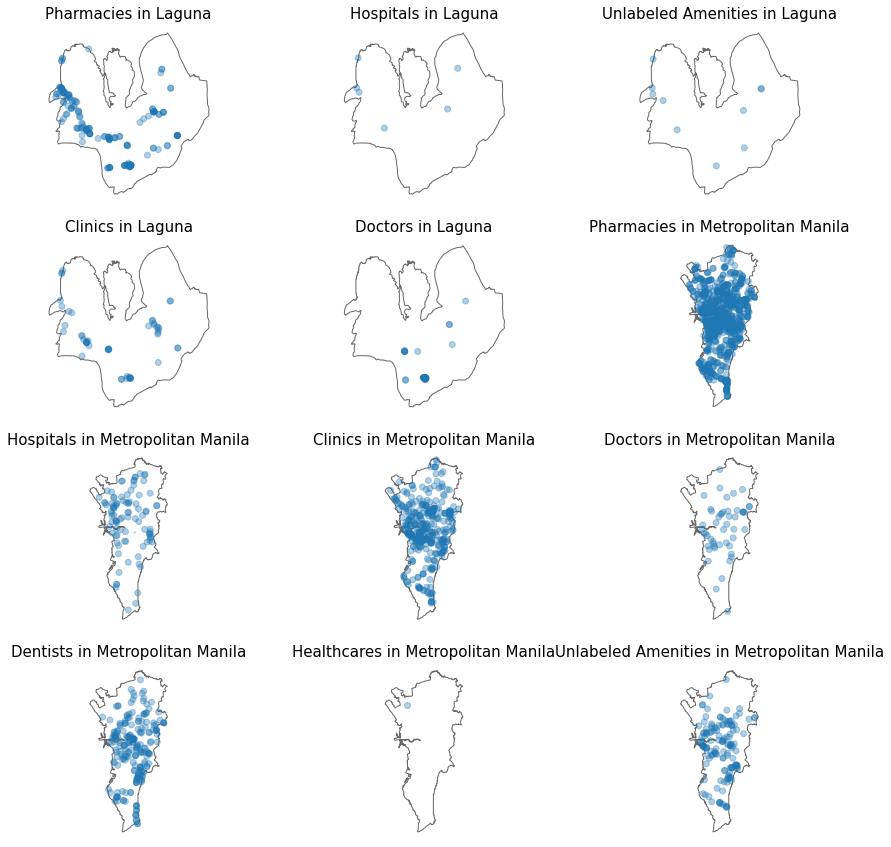

In [48]:
mm_pharmacy   = mm_healhtsites[mm_healhtsites.amenity=='pharmacy']
mm_hospital   = mm_healhtsites[mm_healhtsites.amenity=='hospital']
mm_clinic     = mm_healhtsites[mm_healhtsites.amenity=='clinic']
mm_doctors    = mm_healhtsites[mm_healhtsites.amenity=='doctors']
mm_dentist    = mm_healhtsites[mm_healhtsites.amenity=='dentist']
mm_healthcare = mm_healhtsites[mm_healhtsites.amenity=='healthcare']
mm_unlabeled  = mm_healhtsites[mm_healhtsites.amenity=='']

laguna_pharmacy  = laguna_healthsites[laguna_healthsites.amenity=='pharmacy']
laguna_hospital  = laguna_healthsites[laguna_healthsites.amenity=='hospital']
laguna_clinic    = laguna_healthsites[laguna_healthsites.amenity=='clinic']
laguna_doctors   = laguna_healthsites[laguna_healthsites.amenity=='doctors']
laguna_unlabeled = laguna_healthsites[laguna_healthsites.amenity=='']

fig, axs = plt.subplots(4, 3, figsize=(15,15))

laguna.plot(ax=axs[0, 0], color='white', edgecolor='dimgray')
laguna_pharmacy.plot(ax=axs[0, 0], column='amenity', alpha=0.35)
axs[0, 0].set_title('Pharmacies in Laguna', fontsize=15)
axs[0, 0].axis('off')

laguna.plot(ax=axs[0, 1], color='white', edgecolor='dimgray')
laguna_hospital.plot(ax=axs[0, 1], column='amenity', alpha=0.35)
axs[0, 1].set_title('Hospitals in Laguna', fontsize=15)
axs[0, 1].axis('off')

laguna.plot(ax=axs[0, 2], color='white', edgecolor='dimgray')
laguna_unlabeled.plot(ax=axs[0, 2], column='amenity', alpha=0.35)
axs[0, 2].set_title('Unlabeled Amenities in Laguna', fontsize=15)
axs[0, 2].axis('off')

laguna.plot(ax=axs[1, 0], color='white', edgecolor='dimgray')
laguna_clinic.plot(ax=axs[1, 0], column='amenity', alpha=0.35)
axs[1, 0].set_title('Clinics in Laguna', fontsize=15)
axs[1, 0].axis('off')

laguna.plot(ax=axs[1, 1], color='white', edgecolor='dimgray')
laguna_doctors.plot(ax=axs[1, 1], column='amenity', alpha=0.35)
axs[1, 1].set_title('Independent Doctors in Laguna', fontsize=15)
axs[1, 1].axis('off')

mm.plot(ax=axs[1, 2], color='white', edgecolor='dimgray')
mm_pharmacy.plot(ax=axs[1, 2], column='amenity', alpha=0.35)
axs[1, 2].set_title('Pharmacies in Metropolitan Manila', fontsize=15)
axs[1, 2].axis('off')

mm.plot(ax=axs[2, 0], color='white', edgecolor='dimgray')
mm_hospital.plot(ax=axs[2, 0], column='amenity', alpha=0.35)
axs[2, 0].set_title('Hospitals in Metropolitan Manila', fontsize=15)
axs[2, 0].axis('off')

mm.plot(ax=axs[2, 1], color='white', edgecolor='dimgray')
mm_clinic.plot(ax=axs[2, 1], column='amenity', alpha=0.35)
axs[2, 1].set_title('Clinics in Metropolitan Manila', fontsize=15)
axs[2, 1].axis('off')

mm.plot(ax=axs[2, 2], color='white', edgecolor='dimgray')
mm_doctors.plot(ax=axs[2, 2], column='amenity', alpha=0.35)
axs[2, 2].set_title('Independent Doctors in Metropolitan Manila', fontsize=15)
axs[2, 2].axis('off')

mm.plot(ax=axs[3, 0], color='white', edgecolor='dimgray')
mm_dentist.plot(ax=axs[3, 0], column='amenity', alpha=0.35)
axs[3, 0].set_title('Dentists in Metropolitan Manila', fontsize=15)
axs[3, 0].axis('off')

mm.plot(ax=axs[3, 1], color='white', edgecolor='dimgray')
mm_healthcare.plot(ax=axs[3, 1], column='amenity', alpha=0.35)
axs[3, 1].set_title('Healthcares in Metropolitan Manila', fontsize=15)
axs[3, 1].axis('off')

mm.plot(ax=axs[3, 2], color='white', edgecolor='dimgray')
mm_unlabeled.plot(ax=axs[3, 2], column='amenity', alpha=0.35)
axs[3, 2].set_title('Unlabeled Amenities in Metropolitan Manila', fontsize=15)
axs[3, 2].axis('off')
